<h1>Welcome to Project 1</h1>
<h3>By: Gavin Sharma, Ravi Walberg</h3>

<h5>Data Cleaning</h5>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# READ DATA
df = pd.read_csv("./hotel_bookings.csv")
# df.info()

# CLEAN DATA
# check what data is missing
# df.isnull().sum().sort_values(ascending=False)

# because there is so much missing data from 'company',
# we will remove them from the dataframe
df = df.drop(['company'], axis=1)  

# get the unique values from 'agent' column
df['agent'].unique()
# fill in the 'agent' missing data with the median
df['agent'] = df['agent'].fillna(df['agent'].median())

# fill in the missing data from 'country'
df['country'] = df['country'].fillna(df['country'].mode()[0])

# fill in the missing data from 'children'
df['children'] = df['children'].fillna(df['children'].median())

# recheck for any missing data
df.isnull().sum().sum()

0

<h5>Overview On Dataset</h5>

In [11]:
# Give all of the stats for the dataset
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,76.744392,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,105.904658,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


<h5>Which meal type is most preffered meal of customers?</h5>

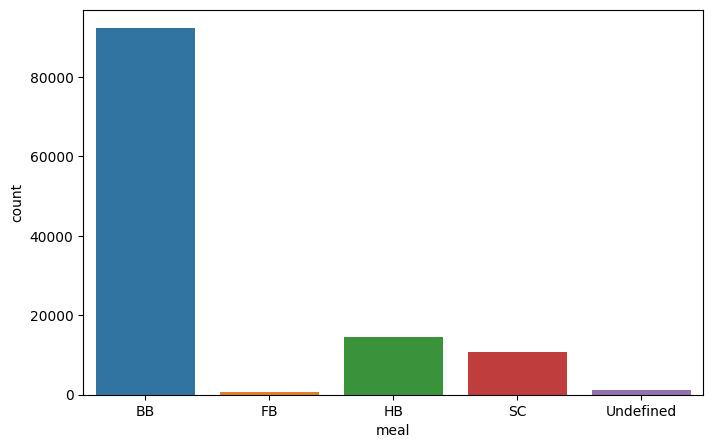

In [12]:
import seaborn as sns

plt.figure( figsize=(8, 5))
sns.countplot(x = df["meal"])
plt.show()

<h5>Which hotel makes more revenue?</h5>

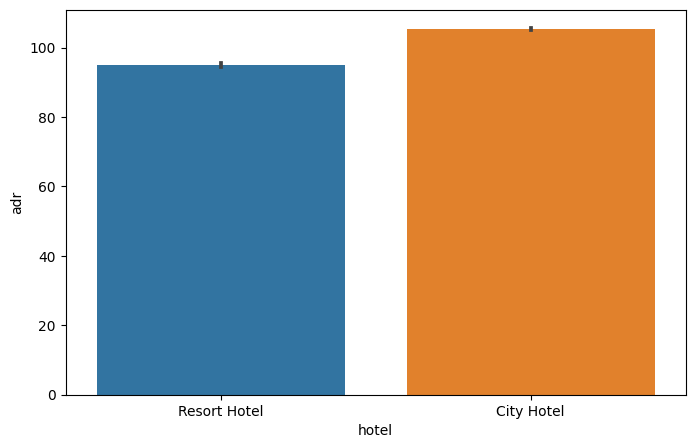

In [13]:
# NOTE: ADR is Average Daily Rate
df.groupby(["hotel"])["adr"].agg(["max","min","mean"])

plt.figure(figsize = (8,5))
sns.barplot(x=df["hotel"], y=df["adr"])
plt.show()

<h5>Which hotel has higher lead time?</h5>

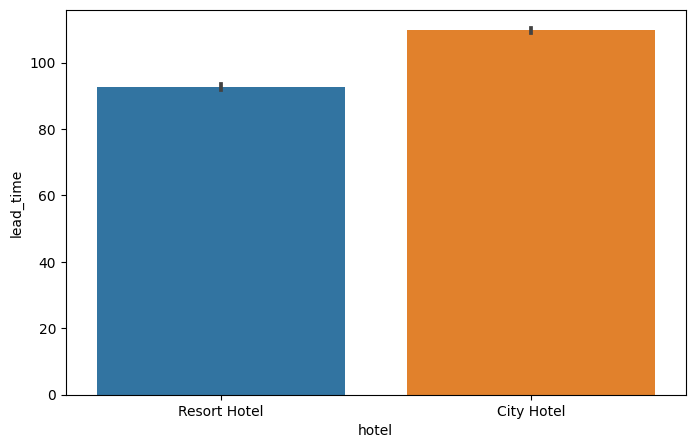

In [14]:
df.groupby(["hotel"])["lead_time"].median()

plt.figure(figsize = (8,5))
sns.barplot(x=df["hotel"], y=df["lead_time"])
plt.show()

# NOTE: This graph is slightly different from the one above

<h5>Which hotel has more wait time?</h5>

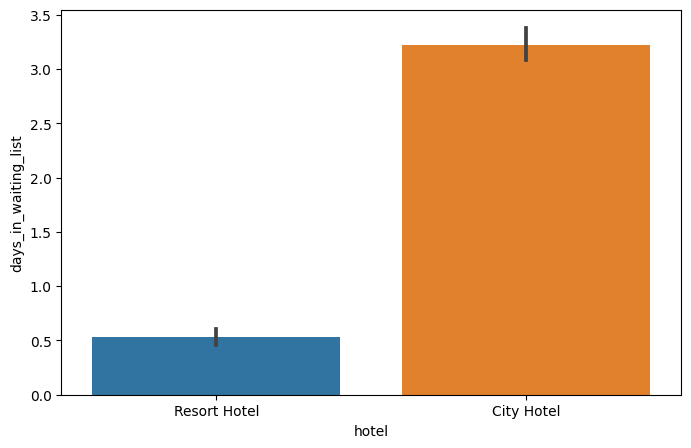

In [15]:
df.groupby(["hotel"])["days_in_waiting_list"].mean()

plt.figure(figsize = (8,5))
sns.barplot(x=df["hotel"], y=df["days_in_waiting_list"])
plt.show()

<h5>Which type of customer arrives the most</h5>

<Axes: xlabel='customer_type', ylabel='count'>

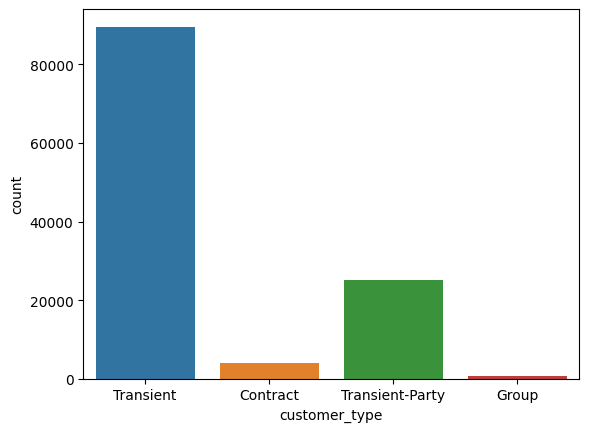

In [16]:
df['customer_type'].value_counts()

sns.countplot(x=df['customer_type'], data=df)